In [2]:
import theano
import theano.tensor as T
import numpy as np
def floatX(x):
    return np.asarray(x, dtype='float32')
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)


## What we have learned
* Concepts
    * **TensorVariable**: Symbolic expression, rank is defined, but not the dimensions
    * **SharedVariable**: Symbolic variable, contains value on GPU
* API's
    * **T.grad**: Automatic Differentiation
    * **theano.function**: Needed for evaluation
    * **givens**: Feeding a value without passing by CPU
    * **updates**: Updating a value without passing by CPU
    
---
## Quiz 1: Damped Oscillator
Waveform of a damped oscillator is 
$$ y = e^{-bt} cos(wt)$$ 
1. Represent this as a symbolic expression. Use `T.exp`, `T.cos` API's.
1. You can model each symbol with one of these: TensorVariable, SharedVariable, Constant. Discuss which one is suitable for each symbol.
1. Now, model $t$ as a TensorVariable vector (unless you have already), and feed in the data: `t_val=floatX(np.linspace(0,5,100))`. Plot $y$ vs. $t$ using `plt.plot(x,y)` API. For other symbolic variables, give it some value you prefer.
1. Change value of `w`, `b` and see how the graph changes.

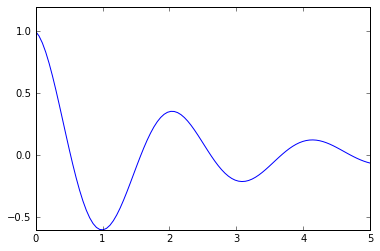

In [3]:
w = 3
b = 0.5
t_val = floatX(np.linspace(0,5,100))
t = T.vector('t')
y = T.exp(-b*t)*T.cos(w*t)
compute_y = theano.function([t], y)
y_val = compute_y(t_val)
plt.plot(t_val, y_val)

## Quiz 2: Find the minimum

The pseudo-potential of orbiting object around mass $M$ with a unit angular moment $l$ is
$$ P(r) = \frac{l^2}{2r^2}-\frac{GM}{r}$$

Representing this potential as a symbolic expression for values `GM=10`, `r_val=1`:

In [4]:
r = theano.shared(1.0, name='r')
l = T.scalar('l')
GM = 10
P = l**2/r**2/2 - GM/r
compute_P = theano.function([l], P)

For `l=1`, compute the P value

In [ ]:
compute_P(1)

How can we compute the minimum? Use Gradient Descent Algorithm to find it. Try for different l value.
$$\theta^{t+1} = \theta^t - \eta \frac{\partial P}{\partial \theta} \vert_{\theta^t}$$

## Rule of Thumb
* If it is a input, use TensorVariable
* If it is a modifiable (trainable) value, use SharedVariable
* If it is not a modifiable value, use Constant (numpy value)

* If the input data is not too big, pre-load the data as a SharedVariable and use `givens`
* Always use `updates`